Developed by: Srikanth Ramanolla.

## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:

        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [7]:
# from <TC_Env> import <TicTacToe> - import your class from environment file
%run TCGame_Env1.py
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [4]:
pip install gym

  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616831 sha256=9988f43f333ace314ae65f38841eeda78cedb558b7be07f270e3fcc756493cdd
  Stored in directory: c:\users\ramanols\appdata\local\pip\cache\wheels\27\6d\b3\a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built gym
Note: you may need to restart the kernel to use updated packages.


In [8]:
## defining object for the Tictac toe environment created as MDP in TCGame_env
env = TicTacToe()

In [9]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [10]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [11]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

In [12]:
# printing the default tic tac toe board positions
Q_state(env.state)

'x-x-x-x-x-x-x-x-x'

In [13]:
# Printing all the valid actions
valid_actions(env.state)

[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 9),
 (1, 1),
 (1, 3),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 5),
 (3, 7),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 7),
 (4, 9),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 9),
 (6, 1),
 (6, 3),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 3),
 (7, 5),
 (7, 7),
 (7, 9),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (8, 9)]

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [15]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy

def epsilon_greedy(state, time, min_epsilon, max_epsilon, decay_rate):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    z = np.random.random()
    print("Z here is:",z)
        
    if z > epsilon: #Exploitation: this gets the action corresponding to max q-value of current state
        state_next = Q_state(state)
        action = max(Q_dict[state_next],key=Q_dict[state_next].get)   
    
    else: #Exploration: randomly choosing and action
        possible_action = [i for i in env.action_space(state)[0]]        
        action = possible_action[np.random.choice(range(len(possible_action)))]    
    
    return action



#### Tracking the state-action pairs for checking convergence - write your code here

In [23]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)


In [24]:
# Initialise states to be tracked
def initialise_tracking_states():
   Sample_Qvalues = [('x-x-x-x-x-x-x-x-x',(6,5)),('x-x-x-x-x-x-x-x-x',(1,9)),
                       ('x-3-x-x-1-x-x-x-x',(7,5)),('x-5-x-x-x-x-5-7-x',(8,2))]    #select some 4 Q-values
   for q_values in Sample_Qvalues:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []
  
  
  

In [25]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [26]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

#### Define hyperparameters  ---write your code here

In [33]:
NUM_OF_EPISODES = 5000
#00000
Learn_Rate = 0.01                   # learning rate
GAMMA_VALUE = 0.9           # discount factor

max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.0001         # epsilon decay rate
threshold = 200             # no of episodes after which states_tracked will be saved
policy_threshold = 300      # no of episodes after which Q dictionary/table will be saved

In [34]:
initialise_tracking_states()

### Q-update loop ---write your code here

In [35]:
start_time = time.time()

for episode in range(NUM_OF_EPISODES):
    ##### Start writing your code from the next line
    
     # initialize the environment
    env = TicTacToe() 
    curr_state = env.state    
    
    # boolean flag to indicate whether it is the final state
    done = False  
    
    # add the current state to dictionary
    add_to_dict(curr_state)  

    while done != True:  
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode, min_epsilon, max_epsilon, decay_rate)   # apply epislon method
        next_state, reward, done = env.step(curr_state, curr_action) # get the rewards
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)

        # Update the rules
        if done != True:
            max_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)  
            # get the action corresponding to max q-value of next state
            Q_dict[curr_state1][curr_action] += Learn_Rate * ((reward + (GAMMA_VALUE*(Q_dict[next_state_temp][max_next])))
                                                      - Q_dict[curr_state1][curr_action] ) 
        else:
            Q_dict[curr_state1][curr_action] += Learn_Rate * ((reward - Q_dict[curr_state1][curr_action]))

        # navigate to the next state
        curr_state = next_state
        
     # track the states
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        
        # save the states tracked
        save_obj(States_track,'States_tracking')
        print("States tracked for episode: " + str(episode))


    #save the Q-dict file after every policy_threshold episodes
    if ((episode+1)% policy_threshold) == 0:  
        
         # update the Q-dict policy
        save_obj(Q_dict,'Q_dict_policy')  
        print("Policy updated for episode: " + str(episode))

elapsed_time = time.time() - start_time
print("Total elapsed time: " + str(episode))
save_obj(States_track,'States_tracking')   
save_obj(Q_dict,'Q_dict_policy')


z here is: 0.028698950111474608
z here is: 0.12485890718265857
z here is: 0.3227209014079312
z here is: 0.9007005821458826
z here is: 0.03314281600763247
z here is: 0.5325299577804469
z here is: 0.9678367119739103
z here is: 0.3554966458444132
z here is: 0.02308648104561606
z here is: 0.8013363242334153
z here is: 0.8606626514141973
z here is: 0.8373364304415197
z here is: 0.06273007812859455
z here is: 0.8125084783789549
z here is: 0.4327058150088462
z here is: 0.010188100862187799
z here is: 0.9491475357979615
z here is: 0.40873622933988374
z here is: 0.012102321184534248
z here is: 0.4689408345710867
z here is: 0.4256556427395175
z here is: 0.02002641436550645
z here is: 0.9342786510909954
z here is: 0.42961294439565945
z here is: 0.9011419253162891
z here is: 0.47319722726285884
z here is: 0.2843424847289733
z here is: 0.4944201231551788
z here is: 0.4446868696952204
z here is: 0.8639721470535368
z here is: 0.546716075317025
z here is: 0.010293738978328859
z here is: 0.567118605655

z here is: 0.11970544607190525
z here is: 0.49247770230877563
z here is: 0.7322255615768887
z here is: 0.8359539937244697
z here is: 0.6285572031486614
z here is: 0.6052919908549381
z here is: 0.44484720295368296
z here is: 0.5881377429845386
z here is: 0.6707931156743191
z here is: 0.8014216313932866
z here is: 0.7870627469184012
z here is: 0.9029336308313572
z here is: 0.7226115811578195
z here is: 0.7946239018251195
z here is: 0.24282567844044767
z here is: 0.13385737216459725
z here is: 0.38344365515168677
z here is: 0.03881003707056563
z here is: 0.5594312070251926
z here is: 0.20049913467139457
z here is: 0.845206825260388
z here is: 0.20744276037482579
z here is: 0.4410472216036404
z here is: 0.2681379876824005
z here is: 0.5142551203137551
z here is: 0.8806092053990878
z here is: 0.6663019953769057
z here is: 0.10743230756806066
z here is: 0.19849680853977514
z here is: 0.6640672592333473
z here is: 0.1465644388669226
z here is: 0.8319192958634245
z here is: 0.2823550898265299


z here is: 0.610916259327297
z here is: 0.01082242247842069
z here is: 0.7299329443934914
z here is: 0.8747005060184818
z here is: 0.33388099025384343
z here is: 0.13761106922413535
z here is: 0.8231751187928934
z here is: 0.43112556496506127
z here is: 0.5780040222520432
z here is: 0.3249806939100591
z here is: 0.5251037665559084
z here is: 0.28261833607103737
z here is: 0.2480574291220644
z here is: 0.14083953884739953
z here is: 0.200487457039476
z here is: 0.6134838827932397
z here is: 0.41882995981040905
z here is: 0.8105384848140467
z here is: 0.8996749801222175
z here is: 0.5261621681976486
z here is: 0.15937137014293723
z here is: 0.6567532392450574
z here is: 0.6618877119320631
z here is: 0.6840060924772982
z here is: 0.8470746774186111
z here is: 0.5415224818693376
z here is: 0.21919761217993472
z here is: 0.5664812959912878
z here is: 0.4938854484549101
z here is: 0.8953232003404122
z here is: 0.5044650595035987
z here is: 0.23624581437560677
z here is: 0.884910970701121
z h

z here is: 0.7124720124971083
z here is: 0.03620618386160468
z here is: 0.1724357069762119
z here is: 0.40918243867991433
z here is: 0.5039435475490213
z here is: 0.6357996037723768
z here is: 0.12387537044241559
z here is: 0.6515740143396339
z here is: 0.02739395564501934
z here is: 0.24665199102753077
z here is: 0.31167791373666764
z here is: 0.7589421116602437
z here is: 0.4748411550401208
z here is: 0.992910183352216
z here is: 0.3404363280112178
z here is: 0.8978289273665299
z here is: 0.1684813408700364
z here is: 0.043665042478525984
z here is: 0.9907288067888848
z here is: 0.1494530757427759
z here is: 0.6257799741238605
z here is: 0.214448418471334
z here is: 0.9838865757753763
z here is: 0.1918857647544745
z here is: 0.7996911599847709
z here is: 0.7020524387370873
z here is: 0.08068266004859026
z here is: 0.9381380035248854
z here is: 0.1923405945784633
z here is: 0.7464518739234295
z here is: 0.48422387793780397
z here is: 0.6258629705758392
z here is: 0.7698139016133889
z 

z here is: 0.6504404085559398
z here is: 0.11690132208490112
z here is: 0.6039417087171769
z here is: 0.9721993958622557
z here is: 0.16463943020390226
z here is: 0.8737950660355186
z here is: 0.7773620277526931
z here is: 0.035633794097751914
z here is: 0.9353164927505992
z here is: 0.895815044662872
z here is: 0.4518814009561357
z here is: 0.1668148296465748
z here is: 0.9966793814045911
z here is: 0.7549705174135384
z here is: 0.5701224455743431
z here is: 0.7169167569143249
z here is: 0.7028942753726083
z here is: 0.1036040599931064
z here is: 0.6193111596440715
z here is: 0.7194848189361839
z here is: 0.8522332468703403
z here is: 0.045266588521814866
z here is: 0.6170663418036209
z here is: 0.4163493427331044
z here is: 0.12450395751048882
z here is: 0.9698225743966816
z here is: 0.3101526379198952
z here is: 0.7413055382058074
z here is: 0.10920170872681778
z here is: 0.473513420193611
z here is: 0.12751374589976128
z here is: 0.25613498179421057
z here is: 0.775196422550897
z h

z here is: 0.15817696576903462
z here is: 0.6924689932350426
z here is: 0.29517636960277305
z here is: 0.7811524956454756
z here is: 0.41512815606330067
z here is: 0.5286377776672231
z here is: 0.3630346968126936
z here is: 0.07327178531414236
z here is: 0.952002035521682
z here is: 0.1438197764874225
z here is: 0.8073398852489663
z here is: 0.20217969616158404
z here is: 0.640711100210798
z here is: 0.24682875555517436
z here is: 0.41893750034364174
z here is: 0.9431659459382662
z here is: 0.8185156799068706
z here is: 0.048697684717688317
z here is: 0.6285491184924638
z here is: 0.7381342127754973
z here is: 0.4867120231566573
z here is: 0.5986589258714968
z here is: 0.8703563568247291
z here is: 0.4971595239922806
z here is: 0.05726632404724474
z here is: 0.5296779215460162
z here is: 0.11485376109566092
z here is: 0.6184008550928252
z here is: 0.7261755146409635
z here is: 0.8250918166181552
z here is: 0.5889076946898413
z here is: 0.5730880990534959
z here is: 0.7553352520326699
z

z here is: 0.6518890538008734
z here is: 0.9634953831265295
z here is: 0.8520010658073132
z here is: 0.10791799597349505
z here is: 0.03442468493533912
z here is: 0.5537614955577732
z here is: 0.3941282973161755
z here is: 0.40980908713597464
z here is: 0.13508850672614425
z here is: 0.7727103553143326
z here is: 0.40197376590116163
z here is: 0.43589183255823494
z here is: 0.30593210591482867
z here is: 0.7984720373796569
z here is: 0.26737490447628187
z here is: 0.04971973972377697
z here is: 0.8123912855340929
z here is: 0.4097343827679243
z here is: 0.3088785753697213
z here is: 0.9885307154593505
z here is: 0.9314444526470532
z here is: 0.7970825704120829
z here is: 0.9717601540756098
z here is: 0.9714105658750353
z here is: 0.18467491771976885
z here is: 0.635848531658538
z here is: 0.07492895920133413
z here is: 0.5736184485503125
z here is: 0.5205533440514857
z here is: 0.9858851950240657
z here is: 0.5242915444895698
z here is: 0.028691845807099048
z here is: 0.278308584890264

z here is: 0.7501142557404156
z here is: 0.18009757246472458
z here is: 0.7807892269407002
z here is: 0.5926017609569975
z here is: 0.6719555864120099
z here is: 0.5536615572507692
z here is: 0.791284106424238
z here is: 0.8313332168262586
z here is: 0.21879945348193852
z here is: 0.9909292691107964
z here is: 0.4224686346698462
z here is: 0.2479012141554745
z here is: 0.2900949438834488
z here is: 0.4109628361671519
z here is: 0.7599762059253338
z here is: 0.9878650112286199
z here is: 0.8066871106493324
z here is: 0.6259603636329671
z here is: 0.41913937282493974
z here is: 0.16727289942289625
z here is: 0.6387277283573448
z here is: 0.47796062454288746
z here is: 0.9257667821015941
z here is: 0.9036922892444058
z here is: 0.8293076622214842
z here is: 0.34334270487712615
z here is: 0.552368479032611
z here is: 0.11792729488718756
z here is: 0.9364338922745231
z here is: 0.5223806888468171
z here is: 0.8601777652009922
z here is: 0.9060846166391776
z here is: 0.8859874383121114
z her

z here is: 0.3426598436914665
z here is: 0.19313348959169618
z here is: 0.5308196916531003
z here is: 0.5461026911361718
z here is: 0.0033249645958771668
z here is: 0.27082442330388634
z here is: 0.9305085919857604
z here is: 0.8543515364498427
z here is: 0.5584479348114121
z here is: 0.3816000088912165
z here is: 0.3944637005366495
z here is: 0.07534870603899269
z here is: 0.9715191516144069
z here is: 0.08281763299728873
z here is: 0.2124332410752401
z here is: 0.15835699847739426
z here is: 0.5536419064867881
z here is: 0.12063783827731256
z here is: 0.4627265775750389
z here is: 0.05329775975377138
z here is: 0.8591716848077053
z here is: 0.31992761499179123
z here is: 0.5910839912427729
z here is: 0.6583781000301289
z here is: 0.9083148959214836
z here is: 0.8651613411275114
z here is: 0.4913922545096361
z here is: 0.7510362538381422
z here is: 0.1351297046406299
z here is: 0.3880901158129536
z here is: 0.7781197345050153
z here is: 0.5755056096080833
z here is: 0.3652892385537774

z here is: 0.5812741717168686
z here is: 0.14751175412786532
z here is: 0.6126717358518795
z here is: 0.7176407200919412
z here is: 0.4802235062688788
z here is: 0.8525592311201944
z here is: 0.9022896250986907
z here is: 0.3727557095349636
z here is: 0.6307149169240006
z here is: 0.5734398359466373
z here is: 0.12250363480922788
z here is: 0.8093170961108367
z here is: 0.8780594808184754
z here is: 0.1455318164392111
z here is: 0.547261226069139
z here is: 0.013542154698377606
z here is: 0.422970443585288
z here is: 0.25469467067194973
z here is: 0.449405704988991
z here is: 0.9468534675824256
z here is: 0.8663333347061196
z here is: 0.5602227249755672
z here is: 0.9857785412149507
z here is: 0.5819347877281923
z here is: 0.6262759663874853
z here is: 0.38715512953965525
z here is: 0.45433998648533147
z here is: 0.8123452305913382
z here is: 0.8729742022566802
z here is: 0.8493511859461452
z here is: 0.16987177240093398
z here is: 0.8233645603513996
z here is: 0.15702709343859278
z he

z here is: 0.6012378789609747
z here is: 0.00284599770110594
z here is: 0.5020359006751538
z here is: 0.5800358042271685
z here is: 0.18428419969885534
z here is: 0.6827123544319106
z here is: 0.6600930042646661
z here is: 0.5190728500882045
z here is: 0.805278334740091
z here is: 0.4944143692434987
z here is: 0.15940797725778555
z here is: 0.032311057556057565
z here is: 0.5392145470932496
z here is: 0.4995984333882807
z here is: 0.3622398508974042
z here is: 0.08037247996182972
z here is: 0.5439447352657995
z here is: 0.9199238678010219
z here is: 0.18881215984765043
z here is: 0.8976765356771075
z here is: 0.2569110443961753
z here is: 0.36888510394695206
z here is: 0.4458876008778363
z here is: 0.4963692832442973
z here is: 0.7785581284782663
z here is: 0.47509623818433
z here is: 0.624935654465209
z here is: 0.19534716688328546
z here is: 0.25982420537039175
z here is: 0.8226388602307687
z here is: 0.18777303945651336
z here is: 0.0051517669948615286
z here is: 0.11552286620235996

z here is: 0.3860227196891203
z here is: 0.31369430575747015
z here is: 0.10275863567724941
z here is: 0.4893920417071602
z here is: 0.5025188469038386
z here is: 0.2531647166491091
z here is: 0.8219124196839666
z here is: 0.6247359583898124
z here is: 0.97919262850146
z here is: 0.5967024711071054
z here is: 0.7619972269233911
z here is: 0.6217797886951133
z here is: 0.8544640259756162
z here is: 0.8211774310262583
z here is: 0.6103507619139175
z here is: 0.270814275094876
z here is: 0.027696108144604326
z here is: 0.897496991235672
z here is: 0.23238444399804392
z here is: 0.8851296099297966
z here is: 0.5078938046446866
z here is: 0.8251380410165566
z here is: 0.5204889679306338
z here is: 0.66664667366882
z here is: 0.31881385408224705
z here is: 0.36653032093545
z here is: 0.016822859809691004
z here is: 0.3735353456194386
z here is: 0.7561387355624638
z here is: 0.8192326092805606
z here is: 0.5595182067370584
z here is: 0.35459729928433337
z here is: 0.30312927211207585
z here i

z here is: 0.4528306506292712
z here is: 0.733671054811073
z here is: 0.3612782356156833
z here is: 0.40242449469608543
z here is: 0.24221909611652193
z here is: 0.41444838395678096
z here is: 0.1403017091492662
z here is: 0.017523951729606413
z here is: 0.8032599616709145
z here is: 0.6263093544957684
z here is: 0.12545175462435854
z here is: 0.10040513687794961
z here is: 0.9013143483949202
z here is: 0.8194404621861568
z here is: 0.21117330580235294
z here is: 0.24290135883115993
z here is: 0.8977454663900808
z here is: 0.893101680976698
z here is: 0.781307885840683
z here is: 0.5708289252853835
z here is: 0.9952793800197354
z here is: 0.9644612202454212
z here is: 0.7678837472842142
z here is: 0.9717980082977192
z here is: 0.8479694116617748
z here is: 0.23303130473806377
z here is: 0.8894191585729283
z here is: 0.6028457470001818
z here is: 0.43019180110634725
z here is: 0.37988810090211755
z here is: 0.756364212706659
z here is: 0.6210641550325411
z here is: 0.44083761866104
z he

z here is: 0.23700826733850355
z here is: 0.5129068613741641
z here is: 0.14464265541517063
z here is: 0.21548907987498067
z here is: 0.44225274524373226
z here is: 0.4283793741851314
z here is: 0.5097366918611953
z here is: 0.5228845126316757
z here is: 0.8110921363147776
z here is: 0.8198734165864755
z here is: 0.6574570465318459
z here is: 0.19326406207790825
z here is: 0.8163993195723924
z here is: 0.46156428753502177
z here is: 0.4483145809720349
z here is: 0.6979329775951657
z here is: 0.7728525969964577
z here is: 0.3006275976013357
z here is: 0.8718663474760552
z here is: 0.38518365993555814
z here is: 0.9238958913903268
z here is: 0.4517083889389081
z here is: 0.8054462701478505
z here is: 0.5737239700181705
z here is: 0.3620896801578162
z here is: 0.8951559422203915
z here is: 0.40468361440567213
z here is: 0.12893885319203513
z here is: 0.6247386926629386
z here is: 0.6327725216587645
z here is: 0.8531988089445258
z here is: 0.012988790367821523
z here is: 0.551722381706959


z here is: 0.28572592009834696
z here is: 0.8135402728606337
z here is: 0.49232936642911107
z here is: 0.13579647509071135
z here is: 0.16377680311501364
z here is: 0.18408969087639238
z here is: 0.964636454282447
z here is: 0.8326905952311965
z here is: 0.5599868462902187
z here is: 0.2613068185367361
z here is: 0.13606415376811953
z here is: 0.6857151497618512
z here is: 0.9009316745311596
z here is: 0.2340061631047924
z here is: 0.05636359441211691
z here is: 0.9984259078141112
z here is: 0.9141431438127916
z here is: 0.018542176966132473
z here is: 0.2651521438612219
z here is: 0.2589147758252528
z here is: 0.8927595088976847
z here is: 0.46927021454458395
z here is: 0.26102678278694325
z here is: 0.5215576158191011
z here is: 0.6378120342960947
z here is: 0.34804747697134253
z here is: 0.208184978568134
z here is: 0.46514581062203386
z here is: 0.3393638432296928
z here is: 0.16034995578919564
z here is: 0.1322849840691045
z here is: 0.33833769513060064
z here is: 0.51109145627030

z here is: 0.6497240850292817
z here is: 0.23597661565412453
z here is: 0.33650337012469633
z here is: 0.571697345047469
z here is: 0.4253747941165461
z here is: 0.7137561386516014
z here is: 0.5264174610726741
z here is: 0.564922973683339
z here is: 0.8278544453054318
z here is: 0.7284120682477699
z here is: 0.9006263086683262
z here is: 0.8180791220604307
z here is: 0.18764662459799686
z here is: 0.48344840320709026
z here is: 0.4793423227974992
z here is: 0.9715438942226324
z here is: 0.7670142598779602
z here is: 0.11572647934198388
z here is: 0.7188092806681999
z here is: 0.36597885070908165
z here is: 0.7380242879896035
z here is: 0.13311158316579075
z here is: 0.25920058200183804
z here is: 0.1564571943830957
z here is: 0.9498169818218638
z here is: 0.8701204675060761
z here is: 0.545029875571804
z here is: 0.17888334123910699
z here is: 0.8323175860427914
z here is: 0.6173841133153471
z here is: 0.9312928889972577
z here is: 0.9013830804280398
z here is: 0.6960219453733993
z he

z here is: 0.670562692334784
z here is: 0.9071000425826844
z here is: 0.08235338073436005
z here is: 0.7983622034736862
z here is: 0.869267293198777
z here is: 0.5472644722307233
z here is: 0.8342727195333628
z here is: 0.48894953404066077
z here is: 0.898839803958034
z here is: 0.9336393076053577
z here is: 0.6683276639088823
z here is: 0.2812880088755776
z here is: 0.08738628657073089
z here is: 0.2628333356214273
z here is: 0.9387900350724327
z here is: 0.3367959529708139
z here is: 0.03861652017915984
z here is: 0.3661706335507793
z here is: 0.8033668484780647
z here is: 0.26679201468144453
z here is: 0.1721941609400215
z here is: 0.6614387226967756
z here is: 0.5762748872169904
z here is: 0.7746393041683745
z here is: 0.8437984626363686
z here is: 0.697609717959239
z here is: 0.25046485569866317
z here is: 0.25514337609680904
z here is: 0.9697972807577473
z here is: 0.33530964993248114
z here is: 0.9182655952728654
z here is: 0.9527868430073275
z here is: 0.5854688090141618
z here

z here is: 0.7204195306976227
z here is: 0.8887689077319276
z here is: 0.9691145783408648
z here is: 0.579271081952219
z here is: 0.3197623855195908
z here is: 0.43811563989872493
z here is: 0.2963660630763031
z here is: 0.22940719265652687
z here is: 0.3240974452888249
z here is: 0.6086722305825223
z here is: 0.42666433949505045
z here is: 0.6493449188739372
z here is: 0.12059790658018055
z here is: 0.49569261189670344
z here is: 0.5128997090550451
z here is: 0.10393994132564399
z here is: 0.014250811378265449
z here is: 0.2748593415306375
z here is: 0.899380981650383
z here is: 0.8790634153481921
z here is: 0.5049518696885178
z here is: 0.059759766972736106
z here is: 0.9209134481038789
z here is: 0.47059972716529186
z here is: 0.05663956173036988
z here is: 0.642681721925845
z here is: 0.8443424445931591
z here is: 0.6506398936469252
z here is: 0.6458403692547472
z here is: 0.42242413781591315
z here is: 0.5121237602652244
z here is: 0.219526921723476
z here is: 0.5389464740743208
z

z here is: 0.572432646674415
z here is: 0.352463425509441
z here is: 0.16912846113012903
z here is: 0.5730122141601046
z here is: 0.5685723003625661
z here is: 0.11091818431672296
z here is: 0.2380923601160938
z here is: 0.29176407957082884
z here is: 0.026008722740031298
z here is: 0.42242780850673667
z here is: 0.959463258771517
z here is: 0.7523796160639215
z here is: 0.5287804573055994
z here is: 0.2199638185179118
z here is: 0.3581375032475117
z here is: 0.8146461808520332
z here is: 0.7499481320321104
z here is: 0.18100094147145962
z here is: 0.7346054997820587
z here is: 0.8691602528260383
z here is: 0.4409900781441739
z here is: 0.15568252052165155
z here is: 0.252109454634739
z here is: 0.3211662775383335
z here is: 0.5147331834293871
z here is: 0.1626895196925695
z here is: 0.26622599583826334
z here is: 0.045602725870894534
z here is: 0.635620744816912
z here is: 0.7802808537170074
z here is: 0.24936262981750035
z here is: 0.25109311146873714
z here is: 0.5326714075032253
z 

z here is: 0.5154785925618316
z here is: 0.22989293931292087
z here is: 0.18947889087484449
z here is: 0.6005211266190054
z here is: 0.3510431645874478
z here is: 0.19759333534452295
z here is: 0.631475718647503
z here is: 0.43907295494265897
z here is: 0.38415012629870615
z here is: 0.6559585663026793
z here is: 0.5043741089112802
z here is: 0.19153034893390586
z here is: 0.05990938271976487
z here is: 0.4080474708518219
z here is: 0.45415441391674627
z here is: 0.6039670892005329
z here is: 0.796602772873615
z here is: 0.6548464005569632
z here is: 0.22905508584360712
z here is: 0.7081523102484979
z here is: 0.7566652730284508
z here is: 0.10878970712144798
z here is: 0.6609273931132605
z here is: 0.08038349558955737
z here is: 0.1860920432037354
z here is: 0.0410961965132699
z here is: 0.4757410003848247
z here is: 0.9086348879861833
z here is: 0.758528165597196
z here is: 0.5513328523279106
z here is: 0.6370075052331622
z here is: 0.7324141973482552
z here is: 0.7019034672567827
z 

z here is: 0.6813417698142765
z here is: 0.7536201954397681
z here is: 0.8449562227489197
z here is: 0.4525424691908906
z here is: 0.7409706352025222
z here is: 0.3433124027857265
z here is: 0.6833110358565134
z here is: 0.8779002633411787
z here is: 0.19461353914894342
z here is: 0.21902755146675834
z here is: 0.633644351602101
z here is: 0.11725498355898967
z here is: 0.7259796302478502
z here is: 0.02798393670011967
z here is: 0.5153728792606467
z here is: 0.315600188346021
z here is: 0.9631830430806158
z here is: 0.8148217658497581
z here is: 0.08938708762882097
z here is: 0.7850814127743267
z here is: 0.8408616142754118
z here is: 0.39469052382417713
z here is: 0.8138908634788953
z here is: 0.35781502544757393
z here is: 0.4515516082038873
z here is: 0.18253157787642327
z here is: 0.05162673873146362
z here is: 0.9856163275815996
z here is: 0.44106783951469186
z here is: 0.5392902929622767
z here is: 0.9474979273488886
z here is: 0.4605010652533834
z here is: 0.10901045157171618
z

z here is: 0.27781299018449424
z here is: 0.8656191451871862
z here is: 0.6176501196560694
z here is: 0.7069423937136329
z here is: 0.8980894514981183
z here is: 0.6062981058786238
z here is: 0.7046648930282312
z here is: 0.7456211871524348
z here is: 0.15414308654308972
z here is: 0.40245874339846
z here is: 0.9650407482489822
z here is: 0.3472123707753719
z here is: 0.11309041706084777
z here is: 0.12789806499593437
z here is: 0.7247216862100991
z here is: 0.46398280141993586
z here is: 0.689301060680526
z here is: 0.19394343824037008
z here is: 0.9250999905565115
z here is: 0.1609085386407404
z here is: 0.1004875092420805
z here is: 0.05460545451582777
z here is: 0.9812096516499177
z here is: 0.33015933254321106
z here is: 0.8266535056105666
z here is: 0.6556793073987753
z here is: 0.19347491870537015
z here is: 0.7738210459176273
z here is: 0.19761242221280018
z here is: 0.5665281294868615
z here is: 0.8769273354935454
z here is: 0.6206348576944782
z here is: 0.07992254937710175
z 

z here is: 0.43050695322077215
z here is: 0.5500197287704468
z here is: 0.5502459650714443
z here is: 0.7037894369034096
z here is: 0.01589539690725661
z here is: 0.13203706396354786
z here is: 0.48259874018725324
z here is: 0.9170357933659578
z here is: 0.6626065001500926
z here is: 0.6346762335895757
z here is: 0.7503063588913081
z here is: 0.7659489408032645
z here is: 0.7814781803915237
z here is: 0.4933738280583787
z here is: 0.40405193916642546
z here is: 0.582540407830678
z here is: 0.807186559789876
z here is: 0.4306053479119374
z here is: 0.599571564466138
z here is: 0.06550817034748624
z here is: 0.8983607613490975
z here is: 0.25068421477426717
z here is: 0.0626293113474049
z here is: 0.5727302672272213
z here is: 0.33438615890419066
z here is: 0.4954487375370994
z here is: 0.9180126210467886
z here is: 0.5597721744764813
z here is: 0.07811899690266355
z here is: 0.05006910163413303
z here is: 0.9306930591637796
z here is: 0.16408526117175226
z here is: 0.5425832022933418
z 

z here is: 0.0234033797087686
z here is: 0.9059337403115545
z here is: 8.08596690968777e-05
z here is: 0.946223581904095
z here is: 0.14602418427987296
z here is: 0.31335418844991625
z here is: 0.38386069433849157
z here is: 0.3784330736261089
z here is: 0.2783544844181396
z here is: 0.9737289869340817
z here is: 0.22719636659668585
z here is: 0.3226048024183896
z here is: 0.8380732344977251
z here is: 0.916411791876404
z here is: 0.7933072154020687
z here is: 0.9394066227753516
z here is: 0.9545415008491879
z here is: 0.47269815672864024
z here is: 0.05405007696844888
z here is: 0.3595680908558554
z here is: 0.9562334123782068
z here is: 0.41837553342201805
z here is: 0.033879079287750136
z here is: 0.8843795400432576
z here is: 0.36129117474136063
z here is: 0.7331848350244948
z here is: 0.6460064429169498
z here is: 0.3539199779408334
z here is: 0.5961801733519263
z here is: 0.9884218039311097
z here is: 0.5937035454566517
z here is: 0.064575169813339
z here is: 0.877130533251843
z 

z here is: 0.5361545011541752
z here is: 0.8164090059985971
z here is: 0.8954691121216818
z here is: 0.952777305257239
z here is: 0.5315825283455929
z here is: 0.4555637533243765
z here is: 0.32296812705524747
z here is: 0.4065562006638498
z here is: 0.0923365689638107
z here is: 0.47721648085307056
z here is: 0.05499725960181223
z here is: 0.3189212378025962
z here is: 0.4968177745494823
z here is: 0.10687072288522836
z here is: 0.903770665481972
z here is: 0.8389203502879211
z here is: 0.47358916055472267
z here is: 0.03882194567396269
z here is: 0.5755816512785324
z here is: 0.1522601234482217
z here is: 0.808260552162086
z here is: 0.7518176691973598
z here is: 0.3642349590895235
z here is: 0.4047061636125332
z here is: 0.32469687986016504
z here is: 0.9547685373885404
z here is: 0.4247569797409583
z here is: 0.6764350474965295
z here is: 0.7176026589675979
z here is: 0.8231722466454838
z here is: 0.12887672630600921
z here is: 0.5682766026173985
z here is: 0.09980969016369001
z he

z here is: 0.041135962667556814
z here is: 0.7245118973403373
z here is: 0.9212353074391207
z here is: 0.9332856201827778
z here is: 0.14827515496152988
z here is: 0.2092225143780685
z here is: 0.5286610709727427
z here is: 0.021382585106865526
z here is: 0.2097363739257626
z here is: 0.04413383763089018
z here is: 0.5628506562568724
z here is: 0.5861286867025285
z here is: 0.5529181545838456
z here is: 0.5060202323752853
z here is: 0.49172302329548856
z here is: 0.16277576475567157
z here is: 0.9471170821312779
z here is: 0.011498378111546415
z here is: 0.93023826289123
z here is: 0.8663743953637294
z here is: 0.16134054565524936
z here is: 0.19338026094284633
z here is: 0.9171774408061392
z here is: 0.0031170322282289
z here is: 0.06497113172007074
z here is: 0.19322070544473835
z here is: 0.3891202446009365
z here is: 0.40215413231980746
z here is: 0.08965033819558088
z here is: 0.6761800056688411
z here is: 0.6682169280262206
z here is: 0.6881990587409207
z here is: 0.9198460165710

z here is: 0.6204988503127254
z here is: 0.5653838022267945
z here is: 0.3387181491763157
z here is: 0.27937214232614627
z here is: 0.6483627445969949
z here is: 0.4163325850822831
z here is: 0.8598778014916443
z here is: 0.16156536160659174
z here is: 0.5366403975404592
z here is: 0.3530362218190707
z here is: 0.5686642871769678
z here is: 0.39527933071133925
z here is: 0.8648813022188899
z here is: 0.3845586041360758
z here is: 0.981562864715004
z here is: 0.19702600957368677
z here is: 0.15890392432491773
z here is: 0.9949487474025485
z here is: 0.9498346288267715
z here is: 0.9829551780232286
z here is: 0.7664976049474145
z here is: 0.9098941843512404
z here is: 0.4609980156627028
z here is: 0.40848436538923116
z here is: 0.38287354616027336
z here is: 0.36363800364822885
z here is: 0.9174606223667072
z here is: 0.7783179546547035
z here is: 0.7578565921214612
z here is: 0.2262008589831067
z here is: 0.8839099444867305
z here is: 0.8561861212073276
z here is: 0.0640647161960185
z h

z here is: 0.46683340199548085
z here is: 0.07723600563085098
z here is: 0.8423326164098741
z here is: 0.6724592942839946
z here is: 0.5382987066479471
z here is: 0.08147037171909377
z here is: 0.691765401366712
z here is: 0.13809462823926477
z here is: 0.6758473246760848
z here is: 0.5237405915985572
z here is: 0.3964860840488298
z here is: 0.7362576766437822
z here is: 0.6736475055239168
z here is: 0.5057371048427988
z here is: 0.2927276204941103
z here is: 0.29375543156107753
z here is: 0.5520247838854718
z here is: 0.13668048892509288
z here is: 0.42639489580781753
z here is: 0.8315603678671489
z here is: 0.01595835993444561
z here is: 0.06314569310686202
z here is: 0.005579947695141807
z here is: 0.6470453426649649
z here is: 0.9892887750426171
z here is: 0.6415385720527641
z here is: 0.9265685164856291
z here is: 0.3588771484965113
z here is: 0.7515401086240276
z here is: 0.013073416373014513
z here is: 0.5775456844092973
z here is: 0.8365599510476857
z here is: 0.95804132968145


z here is: 0.11100816931358548
z here is: 0.6307478387006302
z here is: 0.6434886007541855
z here is: 0.5779855314305596
z here is: 0.2914185892825558
z here is: 0.25159732392605105
z here is: 0.011957588669219144
z here is: 0.05161714094656655
z here is: 0.40859313674209274
z here is: 0.39660988807643294
z here is: 0.9134051718979583
z here is: 0.2216599712093763
z here is: 0.5739429050927213
z here is: 0.49185765344380394
z here is: 0.011538638234646403
z here is: 0.906406505662779
z here is: 0.4172536935672648
z here is: 0.8174521761133655
z here is: 0.5733577471820065
z here is: 0.40151094798954545
z here is: 0.38567758183556977
z here is: 0.5811050719843016
z here is: 0.31833789663711587
z here is: 0.7454400376854028
z here is: 0.1388104361150363
z here is: 0.2965587116960148
z here is: 0.5343828478114397
z here is: 0.8754395654750681
z here is: 0.024340998681514958
z here is: 0.8912759510019211
z here is: 0.6435598133388136
z here is: 0.5009041737300347
z here is: 0.9676993268294

z here is: 0.3029636778010837
z here is: 0.9966287719520904
z here is: 0.2578385235365156
z here is: 0.2808633463365754
z here is: 0.8168607513357153
z here is: 0.35827140424468373
z here is: 0.45499842578092864
z here is: 0.9972237356231632
z here is: 0.48952881346960275
z here is: 0.5244801070000036
z here is: 0.2805933103677756
z here is: 0.49129274828234226
z here is: 0.28601235228381994
z here is: 0.3704201842021869
z here is: 0.16731570848623767
z here is: 0.08316549224388181
z here is: 0.835361196163112
z here is: 0.6789827655446515
z here is: 0.5769140276163641
z here is: 0.5285485032355445
z here is: 0.9603120937992388
z here is: 0.010231028463601022
z here is: 0.6528218178686847
z here is: 0.9364214374257699
z here is: 0.7010040603082045
z here is: 0.8272527482368585
z here is: 0.42811646436121586
z here is: 0.560975733410984
z here is: 0.595050735814276
z here is: 0.5439553117448964
z here is: 0.2737881972530639
z here is: 0.26471499892830896
z here is: 0.04633300563735143
z

z here is: 0.5675108078729418
z here is: 0.413029902715881
z here is: 0.3842678905917505
z here is: 0.2784732846499146
z here is: 0.41830758847740135
z here is: 0.8339860789681934
z here is: 0.316077621266068
z here is: 0.11054946096037155
z here is: 0.33618102435532327
z here is: 0.7579170407527751
z here is: 0.09235736624585356
z here is: 0.042311139671254216
z here is: 0.6108850004881321
z here is: 0.45806771165121585
z here is: 0.1096827061689517
z here is: 0.01790195409842321
z here is: 0.5885409720554188
z here is: 0.9645538734056279
z here is: 0.0009540725004443251
z here is: 0.6036397168626617
z here is: 0.33904381888285173
z here is: 0.072727759382064
z here is: 0.15295575148797236
z here is: 0.8524297252679999
z here is: 0.8072916475196535
z here is: 0.724680852142452
z here is: 0.6805656537291043
z here is: 0.2792129446301278
z here is: 0.16358910172762686
z here is: 0.7908358833040182
z here is: 0.5969032899942898
z here is: 0.4577010345023862
z here is: 0.630128990940551
z

z here is: 0.8863917580385209
z here is: 0.313273272815203
z here is: 0.3261435090211563
z here is: 0.5613823247403026
z here is: 0.07386123810450196
z here is: 0.38193019153570873
z here is: 0.09848045338680489
z here is: 0.8802165996387789
z here is: 0.9139469548232809
z here is: 0.3921104832480451
z here is: 0.3137398374603181
z here is: 0.6814975863535111
z here is: 0.09659977289989896
z here is: 0.47467530579335293
z here is: 0.17021345546238908
z here is: 0.6557242748628349
z here is: 0.7245054727305652
z here is: 0.22912872212806212
z here is: 0.6744176771444369
z here is: 0.3966498126396596
z here is: 0.6139521424695028
z here is: 0.2584663397323209
z here is: 0.6188012327140612
z here is: 0.6321063903729524
z here is: 0.9735995995853143
z here is: 0.9231778241308719
z here is: 0.23842853697828859
z here is: 0.36275370059532297
z here is: 0.4237507304225956
z here is: 0.8058050459960694
z here is: 0.38649176357688175
z here is: 0.4839161653784282
z here is: 0.28078965428695113


z here is: 0.7497259320396477
z here is: 0.5164524929819425
z here is: 0.42441461239821066
z here is: 0.5970744223646195
z here is: 0.05642856553451092
z here is: 0.6520312353648625
z here is: 0.986226259200312
z here is: 0.8961301730409371
z here is: 0.01968131738970036
z here is: 0.9100482187646349
z here is: 0.04784789184180638
z here is: 0.09277699187829014
z here is: 0.5697319949002053
z here is: 0.16812043858964842
z here is: 0.9064339465149257
z here is: 0.7714039153723891
z here is: 0.2890717666808157
z here is: 0.036995955019495375
z here is: 0.4485527629098617
z here is: 0.3559565142607072
z here is: 0.027789054361725074
z here is: 0.9799675290956077
z here is: 0.8888443265440543
z here is: 0.4201151359828976
z here is: 0.8166017071001932
z here is: 0.32053668835923776
z here is: 0.9834472929217408
z here is: 0.3025310518616372
z here is: 0.4173089866061953
z here is: 0.29710985208621465
z here is: 0.25967895887222037
z here is: 0.3890605331168775
z here is: 0.106860345090151

z here is: 0.2559879454187909
z here is: 0.15434375284880275
z here is: 0.6134950094066712
z here is: 0.39530940498849554
z here is: 0.9657360786025431
z here is: 0.3411608494252628
z here is: 0.34858561474071337
z here is: 0.1466051469448839
z here is: 0.8488664156613875
z here is: 0.22825685450209843
z here is: 0.8417723620821552
z here is: 0.7473994862517059
z here is: 0.7950299559185696
z here is: 0.5928781523264162
z here is: 0.7264987188201641
z here is: 0.7740151183106005
z here is: 0.9774593806887623
z here is: 0.939159125508562
z here is: 0.2810602221337697
z here is: 0.015818742133411945
z here is: 0.45655001189643707
z here is: 0.819927243434947
z here is: 0.3196517888865017
z here is: 0.5114197501208912
z here is: 0.41621310275253054
z here is: 0.18550313625056014
z here is: 0.9324230326062815
z here is: 0.7984562261885416
z here is: 0.6905630791679298
z here is: 0.5319661243586228
z here is: 0.3768056183853137
z here is: 0.43086345313720265
z here is: 0.8241531414199073
z 

Policy updated for episode: 3299
z here is: 0.7755985218314484
z here is: 0.5286733301875107
z here is: 0.3567134639237646
z here is: 0.9153834317981551
z here is: 0.5855141547290653
z here is: 0.6609430363142252
z here is: 0.8351838037906503
z here is: 0.6675108585271095
z here is: 0.6783796935779185
z here is: 0.3045476391495733
z here is: 0.9131039174365163
z here is: 0.945009723531643
z here is: 0.4146067992165525
z here is: 0.39997072986458737
z here is: 0.7938478590830123
z here is: 0.46345578187230285
z here is: 0.5974892738909595
z here is: 0.17369257920579972
z here is: 0.6227113192207036
z here is: 0.7753198435214734
z here is: 0.8673653769470763
z here is: 0.788794038944011
z here is: 0.4812814646357503
z here is: 0.10027466197003554
z here is: 0.5788316930117196
z here is: 0.43118132356496586
z here is: 0.07096311179461423
z here is: 0.8926335837433264
z here is: 0.16746147724337412
z here is: 0.5760239572465742
z here is: 0.5125002409383985
z here is: 0.7754344149002356
z 

z here is: 0.12575607573401748
z here is: 0.08394565263428155
z here is: 0.42072901150867437
z here is: 0.48083209621737333
z here is: 0.7959106369753846
z here is: 0.6804965296769624
z here is: 0.6473490232434569
z here is: 0.16859433454853834
z here is: 0.24746110098974627
States tracked for episode: 3399
z here is: 0.011311981378038571
z here is: 0.9983954468013686
z here is: 0.7858354910673546
z here is: 0.016013957083738317
z here is: 0.7099263815879191
z here is: 0.9908513433796597
z here is: 0.472939001817854
z here is: 0.5192974793836853
z here is: 0.923476106643004
z here is: 0.3855610513297091
z here is: 0.4007287508765842
z here is: 0.19992783640670764
z here is: 0.4696414301588039
z here is: 0.8694672563825359
z here is: 0.6881174954032117
z here is: 0.6422768046628334
z here is: 0.3089709357084507
z here is: 0.3391870443046251
z here is: 0.8685752859271921
z here is: 0.05906787055942364
z here is: 0.2924327364838295
z here is: 0.905203076884102
z here is: 0.646927757225289

z here is: 0.44281111308903376
z here is: 0.15141784327034957
z here is: 0.8948025871346988
z here is: 0.5278300461438346
z here is: 0.09546685486259221
z here is: 0.6961620773569062
z here is: 0.859252625410804
z here is: 0.024460679755824555
z here is: 0.9798985703489794
z here is: 0.31270423610355524
z here is: 0.0370099185058671
z here is: 0.7959142826451127
z here is: 0.1619505176682744
z here is: 0.30480324307478557
z here is: 0.41749979473500465
z here is: 0.005671276271230652
z here is: 0.15459770197116285
z here is: 0.7013527730349683
z here is: 0.4024937051377757
z here is: 0.5875687067783526
z here is: 0.8601492751586766
z here is: 0.6052213339650585
z here is: 0.24335905738826002
z here is: 0.198202629589616
z here is: 0.3779948659765968
z here is: 0.4924497336689698
z here is: 0.9573972429722329
z here is: 0.6568928161676653
z here is: 0.2337233786986126
z here is: 0.7247106058330934
z here is: 0.6456178724752565
z here is: 0.1957465572388838
z here is: 0.675276843089676
z

z here is: 0.39209010424553625
z here is: 0.12343547320003956
z here is: 0.31353776512141407
z here is: 0.4534720640756196
z here is: 0.027566759116799955
z here is: 0.15411377619829014
z here is: 0.3662352574723653
z here is: 0.49340847530099063
z here is: 0.9750650743097764
z here is: 0.043289325829034664
z here is: 0.8711395111895831
z here is: 0.22533315818942512
z here is: 0.923063603727129
z here is: 0.6860991740969866
z here is: 0.785716269404584
z here is: 0.14127363979182783
z here is: 0.46862133591292177
z here is: 0.972029821363804
z here is: 0.7130242241609777
z here is: 0.31927431082637936
z here is: 0.47966095680521126
z here is: 0.965995685496456
z here is: 0.8988561360544081
z here is: 0.9180236187261755
z here is: 0.07255823615358481
z here is: 0.06285320897426183
z here is: 0.7194445655669546
z here is: 0.964981049396941
z here is: 0.3458459138678668
z here is: 0.49764582937368784
z here is: 0.6179443634881177
z here is: 0.05740536641992944
z here is: 0.74762337086438

z here is: 0.1354429940957338
z here is: 0.8577891102675402
z here is: 0.9407786068457454
z here is: 0.1326387925495044
z here is: 0.5776670453960024
z here is: 0.05439577608951485
z here is: 0.28338083372207845
z here is: 0.35466968853897585
z here is: 0.5038278453585207
z here is: 0.3074062703999414
z here is: 0.09331508812891787
z here is: 0.23623576937869495
z here is: 0.7477083578497848
z here is: 0.4736464687460734
z here is: 0.7098865102749784
z here is: 0.8494058457414464
z here is: 0.29897782290863417
z here is: 0.7623836014458312
z here is: 0.9850362574876558
z here is: 0.48575331609356787
z here is: 0.614996535597198
z here is: 0.6752225715874343
z here is: 0.187176290572186
z here is: 0.02348810813825486
z here is: 0.7050700232966902
z here is: 0.19146309140528017
z here is: 0.2292605326360837
z here is: 0.3653377630221415
z here is: 0.6045697995004008
z here is: 0.29093964039754017
z here is: 0.40296460188237404
z here is: 0.03689749736657866
z here is: 0.9126813745385591


States tracked for episode: 3799
z here is: 0.6644686508580417
z here is: 0.5728124454763738
z here is: 0.8023971074946277
z here is: 0.48273439182324573
z here is: 0.9427136761260073
z here is: 0.20326817230747374
z here is: 0.628066747836699
z here is: 0.2541544578588353
z here is: 0.7490428547924173
z here is: 0.27001003141872093
z here is: 0.09757867271828202
z here is: 0.5288908084434619
z here is: 0.40620113778475553
z here is: 0.8663153752060855
z here is: 0.7734870792684505
z here is: 0.31296241240280376
z here is: 0.6826866059426508
z here is: 0.12910706670256133
z here is: 0.34332077502688385
z here is: 0.28343468639415437
z here is: 0.942553742939587
z here is: 0.16707017227810783
z here is: 0.8861178313376641
z here is: 0.6851105895295696
z here is: 0.9628554875809857
z here is: 0.21839353342929002
z here is: 0.38011134605073515
z here is: 0.3931420096490432
z here is: 0.40304222114094546
z here is: 0.7336386721721108
z here is: 0.7045870114007231
z here is: 0.4892078946914

Policy updated for episode: 3899
z here is: 0.5422084212556357
z here is: 0.11267335752335983
z here is: 0.6965559462200951
z here is: 0.4950476731129011
z here is: 0.6006862859814684
z here is: 0.9707665863072537
z here is: 0.11997493202345055
z here is: 0.1379045358638319
z here is: 0.8646285790586679
z here is: 0.034703645143732254
z here is: 0.21756291811741368
z here is: 0.17478287065188025
z here is: 0.9128454856579794
z here is: 0.727204120860301
z here is: 0.8770686595727469
z here is: 0.4502052450918257
z here is: 0.45808473976494246
z here is: 0.6171985282687115
z here is: 0.9680939216689454
z here is: 0.5003299522738806
z here is: 0.9799678844137021
z here is: 0.1519644383856632
z here is: 0.9310900316556399
z here is: 0.683997836539969
z here is: 0.6488433822047911
z here is: 0.07190873755540805
z here is: 0.8088557839288372
z here is: 0.3521033586818463
z here is: 0.4002568583952796
z here is: 0.5172661173107074
z here is: 0.4462525168500229
z here is: 0.9122640874655258
z

z here is: 0.991811309070974
z here is: 0.38733316377903504
z here is: 0.9164192512766062
z here is: 0.6317591097131122
z here is: 0.8622712361962374
z here is: 0.5802281904277043
z here is: 0.22638099909701692
z here is: 0.7295418937257477
z here is: 0.09961385160935443
z here is: 0.3640074800733589
z here is: 0.4413641461906074
z here is: 0.0037415712651804878
z here is: 0.37524247512942766
z here is: 0.4405253840112918
z here is: 0.44060440271238044
z here is: 0.4240661452519744
z here is: 0.4088493032591065
z here is: 0.16100973378119077
z here is: 0.2755550093161897
z here is: 0.8397138825612068
z here is: 0.6345354650242203
z here is: 0.3433577686335848
z here is: 0.6423208804689267
z here is: 0.08819387691805103
z here is: 0.060894455192137764
z here is: 0.579942697329493
z here is: 0.12777214115749314
z here is: 0.9629491841559226
z here is: 0.3788681298944717
z here is: 0.24753118562573284
z here is: 0.04179053235489505
z here is: 0.672593645381089
z here is: 0.289476319485624

z here is: 0.9327066181016596
z here is: 0.6208371933667517
z here is: 0.6724821567815193
z here is: 0.7707446744573598
z here is: 0.7052871333112576
z here is: 0.6568953295774183
z here is: 0.5491130541441885
z here is: 0.2794453095931989
z here is: 0.04001401548872163
z here is: 0.5390434949462614
z here is: 0.11048246483911617
z here is: 0.4673177949654608
z here is: 0.6301211410426795
z here is: 0.616520882835481
z here is: 0.02720736865763118
z here is: 0.5573928302399697
z here is: 0.5547007090038129
z here is: 0.7474782135549619
z here is: 0.6669155379635726
z here is: 0.9676460978165473
z here is: 0.9852987539634223
z here is: 0.08334709764077675
z here is: 0.6359446842379257
z here is: 0.1594173143390537
z here is: 0.9817394465620641
z here is: 0.3866346589431824
z here is: 0.764624455164419
z here is: 0.6711554172546377
z here is: 0.8690985668331979
z here is: 0.05862774373733559
z here is: 0.05556225141691151
z here is: 0.2530037543974294
z here is: 0.009491102784536909
z he

Policy updated for episode: 4199
z here is: 0.8287771140635268
z here is: 0.03677321475255735
z here is: 0.3971391632434773
z here is: 0.11642149772996646
z here is: 0.7119938991082183
z here is: 0.4108538228835469
z here is: 0.3012056196205898
z here is: 0.9322469849285447
z here is: 0.775333603599882
z here is: 0.4974971754524672
z here is: 0.4675462293603375
z here is: 0.1594149199949747
z here is: 0.4778620877510176
z here is: 0.2327383205887147
z here is: 0.2666384233810797
z here is: 0.04909246754826613
z here is: 0.353699438433005
z here is: 0.9832886850116531
z here is: 0.12345520024606071
z here is: 0.5300675969807389
z here is: 0.20401384378998078
z here is: 0.26059311318950673
z here is: 0.5263959057678559
z here is: 0.9750281864748523
z here is: 0.7614191644758106
z here is: 0.22674682810339086
z here is: 0.8170089459447201
z here is: 0.9803518019853753
z here is: 0.10482360700033855
z here is: 0.4305313248494176
z here is: 0.011383771117306374
z here is: 0.1025423519819598

z here is: 0.9044312433862712
z here is: 0.3104119215396778
z here is: 0.6269434126161674
z here is: 0.13093732709766492
z here is: 0.7888732121932138
z here is: 0.25762294729722857
z here is: 0.2867715762206363
z here is: 0.21393928382758964
z here is: 0.4571638329488247
z here is: 0.9349788467531673
z here is: 0.720179703330683
z here is: 0.7878503099146272
z here is: 0.0692638244043896
z here is: 0.7506430214694089
z here is: 0.8890044386493814
z here is: 0.11525698572385168
z here is: 0.641431347169615
z here is: 0.5295297728939371
z here is: 0.9555944946235855
z here is: 0.7815609924765013
z here is: 0.6906016914049711
z here is: 0.27359579985319493
z here is: 0.1888006952796396
z here is: 0.17608648962656015
z here is: 0.16292275345029839
z here is: 0.07277649076839243
z here is: 0.8923226264531414
z here is: 0.07820233175686442
z here is: 0.5923659093368001
z here is: 0.38137100693390635
z here is: 0.6851304074837902
z here is: 0.9546289485892493
z here is: 0.506465858313146
z h

z here is: 0.8217615104143666
z here is: 0.29518210196355554
z here is: 0.529521693848737
z here is: 0.920613139736101
z here is: 0.7281844811800242
z here is: 0.38074935404854404
z here is: 0.5921313009564588
z here is: 0.6680381495446318
z here is: 0.2603121391795201
z here is: 0.41010452673199993
z here is: 0.3864126830617737
z here is: 0.30626209995570397
z here is: 0.8688353034285412
z here is: 0.14463882984859366
z here is: 0.48117209205590217
z here is: 0.44562572586649607
States tracked for episode: 4399
z here is: 0.5915062336850746
z here is: 0.6183821510212636
z here is: 0.6767968818404019
z here is: 0.7885642845951615
z here is: 0.46572349941913316
z here is: 0.9351277955800732
z here is: 0.8422307600860919
z here is: 0.42973283051708466
z here is: 0.7954023034505668
z here is: 0.93435780422311
z here is: 0.5938585265063401
z here is: 0.059164611442934056
z here is: 0.4917585664273
z here is: 0.46471525382789736
z here is: 0.5525963253165114
z here is: 0.9510413540547107
z 

z here is: 0.37548973835947086
z here is: 0.9427967494830751
z here is: 0.08669978075671403
z here is: 0.25295299819611694
z here is: 0.37058318169773297
z here is: 0.8868301895902676
z here is: 0.7702187372968906
z here is: 0.07063069985226023
z here is: 0.18970785139278
z here is: 0.4686645700553931
z here is: 0.8318619902740212
z here is: 0.9567266937801642
z here is: 0.7462418675843415
z here is: 0.8470028171368393
z here is: 0.8779779244438267
z here is: 0.9355945890257621
z here is: 0.4909473908522971
z here is: 0.10654089793449861
z here is: 0.23554971310914508
z here is: 0.9757088033680843
z here is: 0.5569487540408123
z here is: 0.42960204703851546
z here is: 0.533191195478248
z here is: 0.13179787158110456
z here is: 0.8713860666019217
z here is: 0.9933574956242036
z here is: 0.07251531333970884
z here is: 0.8172887559958293
z here is: 0.27331051661421535
z here is: 0.9746028957906535
z here is: 0.827982137421043
z here is: 0.5276517569525472
z here is: 0.29113572473794014
z 

z here is: 0.3481121186194611
z here is: 0.702943721355578
z here is: 0.5860515981464931
z here is: 0.0700082922939822
z here is: 0.07545456405713868
z here is: 0.10806135863988009
z here is: 0.5418206866942058
z here is: 0.29546191559889534
z here is: 0.21585295062769383
z here is: 0.13640698076443414
z here is: 0.5002617283013514
z here is: 0.03839307199030351
z here is: 0.1094562213700071
z here is: 0.8536913973198756
z here is: 0.4481438903171371
z here is: 0.24135190676527085
z here is: 0.1124844449045943
z here is: 0.3725382307532924
z here is: 0.2576330192577869
z here is: 0.19096965151698053
z here is: 0.9177122871560329
z here is: 0.4892641045236893
z here is: 0.7825261817862504
z here is: 0.2705454359257917
z here is: 0.6794524484100319
z here is: 0.8819812867919209
z here is: 0.067875824810123
z here is: 0.7003229448201268
z here is: 0.15765669994431641
z here is: 0.6848657995156562
z here is: 0.6789587805398027
z here is: 0.37541180521408013
z here is: 0.1376312300503688
z 

z here is: 0.06269430496912654
z here is: 0.589410714117572
z here is: 0.47493434379561916
z here is: 0.1516981791453671
z here is: 0.17020849158568618
z here is: 0.054179290038382066
z here is: 0.7207087532639481
z here is: 0.1437780222497711
z here is: 0.2062270833669294
z here is: 0.8299370142041887
z here is: 0.3560645883389809
z here is: 0.9694288904193
z here is: 0.22404459021331358
z here is: 0.007256013209861023
z here is: 0.8903644560666775
z here is: 0.08207139851957379
z here is: 0.266384645964022
z here is: 0.8448748507420286
z here is: 0.6041019139691823
z here is: 0.6315743923844698
z here is: 0.05354811835522122
z here is: 0.8115462990640366
z here is: 0.6564121285370519
z here is: 0.9581388939491119
z here is: 0.4107916246636426
z here is: 0.3029958371925757
z here is: 0.30640267860133086
z here is: 0.7662048290181728
z here is: 0.818442700841145
z here is: 0.951164690707672
z here is: 0.7290661512765214
z here is: 0.10927851967231239
z here is: 0.4672578761018017
z her

z here is: 0.0004361936782626419
z here is: 0.9696120323983981
z here is: 0.39685394731132484
z here is: 0.43552130607300577
z here is: 0.09308114074931495
z here is: 0.3231500144085899
z here is: 0.7310178481616141
z here is: 0.49864492073572164
z here is: 0.6914239112094283
z here is: 0.21583242024719018
z here is: 0.37570604633175453
z here is: 0.8902249398112436
z here is: 0.9613127411910628
z here is: 0.2876185194683507
z here is: 0.4952735384416005
z here is: 0.5958646872203639
z here is: 0.7260330852189668
z here is: 0.6600299788282797
z here is: 0.12464106355321047
z here is: 0.34589217222847646
z here is: 0.6950384239688777
z here is: 0.3471347447941602
z here is: 0.3785180850699996
z here is: 0.6408177736649602
z here is: 0.40909813377104964
z here is: 0.4854995547241786
z here is: 0.5164622402753434
z here is: 0.7383480792520298
z here is: 0.48670237788744874
z here is: 0.7111124397179434
z here is: 0.0781052490572276
z here is: 0.7175156138175516
z here is: 0.70476029767953

z here is: 0.0330118253568813
z here is: 0.9142478833489764
z here is: 0.5538830816020949
z here is: 0.05779448221166206
z here is: 0.5750542661911631
z here is: 0.2573359932831828
z here is: 0.723392426988342
z here is: 0.215511411480522
z here is: 0.5637966289695291
z here is: 0.24449049062223005
z here is: 0.7131727344172486
z here is: 0.3460657381128436
z here is: 0.06954958687820567
z here is: 0.5095549380950762
z here is: 0.8499644846085948
z here is: 0.0985705626723754
z here is: 0.8950167184041046
z here is: 0.44234146518515727
z here is: 0.1834784920361605
z here is: 0.6037215443772865
z here is: 0.2898843197002521
z here is: 0.4761403678485462
z here is: 0.8382040013188704
z here is: 0.5460991201690939
z here is: 0.4908086700110138
z here is: 0.7242977277573547
z here is: 0.840131007000235
z here is: 0.11631738145325587
z here is: 0.9077312179109208
z here is: 0.9546825933976854
z here is: 0.1574566796236757
z here is: 0.17440451814120572
z here is: 0.021603556251354128
z her

z here is: 0.8533566288081536
z here is: 0.5479637891963104
z here is: 0.7984842939427058
z here is: 0.43968100901428075
z here is: 0.2477083498992323
z here is: 0.729533764365316
z here is: 0.6711426257499085
z here is: 0.2452927742481945
z here is: 0.427042179079575
z here is: 0.17344820121400983
z here is: 0.1997759539679378
z here is: 0.8270419048918214
z here is: 0.5063481548494886
z here is: 0.1870589899056928
z here is: 0.10019546856184325
z here is: 0.873366087562629
z here is: 0.8840515841268767
z here is: 0.38495965628885276
z here is: 0.6200165373939021
z here is: 0.06654625074176646
z here is: 0.8064466480743979
z here is: 0.4133798277915134
z here is: 0.041800493915061465
z here is: 0.9167465349293122
z here is: 0.895076449622285
z here is: 0.6383691653026591
z here is: 0.2619967730585899
z here is: 0.9069037781390544
z here is: 0.4413980898051456
z here is: 0.34651055056527635
z here is: 0.6621849475862833
z here is: 0.5014853489485799
z here is: 0.7721682221283892
z here

#### Check the Q-dictionary

In [36]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -0.6722772425621962,
              (0, 3): -0.6722772425621962,
              (0, 5): -0.6722772425621962,
              (0, 7): -0.6722772425621962,
              (0, 9): -0.6755544701365742,
              (1, 1): -0.6722772425621962,
              (1, 3): -0.6722772425621962,
              (1, 5): -0.6722772425621962,
              (1, 7): -0.6820109361808564,
              (1, 9): -0.6722772425621962,
              (2, 1): -0.6820109361808564,
              (2, 3): -0.6722772425621962,
              (2, 5): -0.6722772425621962,
              (2, 7): -0.6722772425621962,
              (2, 9): -0.6722772425621962,
              (3, 1): -0.6722772425621962,
              (3, 3): -0.6722772425621962,
              (3, 5): -0.6722772425621962,
              (3, 7): -0.6755544701365742,
              (3, 9): -0.6722772425621962,
              (4, 1): -0.6755544701365742,
              (4, 3): -0.6722772425621962,
              (

In [37]:
len(Q_dict)

15251

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [38]:
# Write the code for plotting the graphs for state-action pairs tracked

<function matplotlib.pyplot.show(close=None, block=None)>

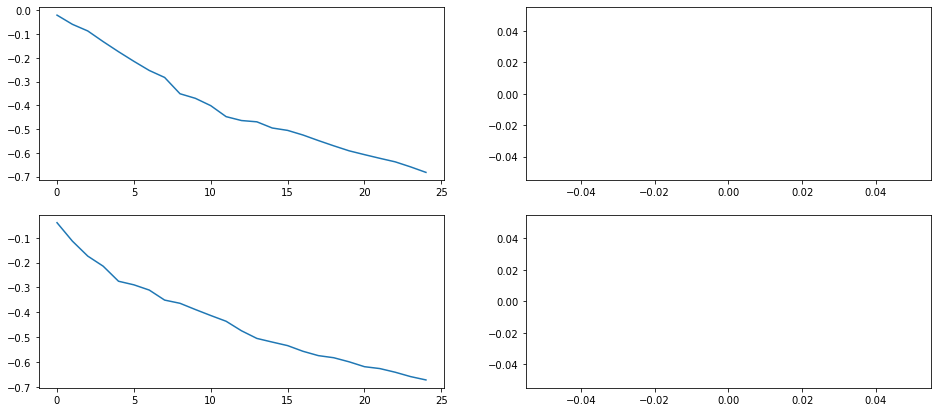

In [39]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
plt.figure(0, figsize=(16,7))

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(6,5)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(6,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-3-x-x-1-x-x-x-x'][(7,5)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-3-x-x-1-x-x-x-x'][(7,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(1,9)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(1,9)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-5-x-x-x-x-5-7-x'][(8,2)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['x-5-x-x-x-x-5-7-x'][(8,2)]))
plt.show

### Epsilon - decay check

In [40]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

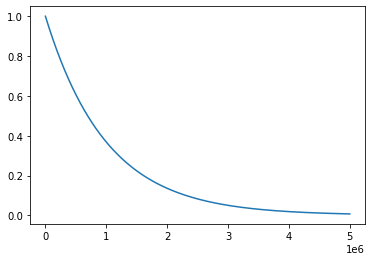

In [41]:
plt.plot(time, epsilon)
plt.show()